Avril Michelle Ruiz Martínez

A00833018

# Entrega 3 

## Preparación

In [144]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [146]:
data = pd.read_excel("finalfinal.xlsx")

In [147]:
# let's take a look at the data
data.head()

,PLANTAORIGEN,D_CLIENTE,ESTADO,D_EMPRESA_TRANSPORTISTA,TIPO_SERVICIO,TIPOTRANSPORTE,TIPO_PRODUCTO,TIPO_FORMA,CANT_PROGRAMADA,PESO_NETO,CAP_MAXIMA,CIUDAD,is_nuevo_leon,not_nuevo_leon,CANT_PROGRAMADA_DIS,PESO_NETO_DIS
0,Guerrero,CLIENTE58,nuevo leon,TRANPORTE68,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,38.386,38.47,54.0,monterrey,1,0,"(35, 42]","(35.0, 42.0]"
1,Guerrero,CLIENTE132,nuevo leon,TRANPORTE68,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,31.572,31.53,54.0,cienega de flores,1,0,"(28, 35]","(28.0, 35.0]"
2,Guerrero,CLIENTE58,nuevo leon,TRANPORTE68,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,39.265,39.39,54.0,monterrey,1,0,"(35, 42]","(35.0, 42.0]"
3,Guerrero,CLIENTE58,nuevo leon,TRANPORTE68,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,39.900,39.85,54.0,monterrey,1,0,"(35, 42]","(35.0, 42.0]"
4,Guerrero,CLIENTE171,nuevo leon,TRANPORTE68,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,31.677,31.55,54.0,apodaca,1,0,"(28, 35]","(28.0, 35.0]"


In [5]:
data.shape

(12941, 16)

In [6]:
data = data.drop(["PESO_NETO", "PESO_NETO_DIS"],axis=1)  #Axis=1 - hace referencia a columnas

debido a que PESO_NETO tiene un muy fuerte correlación con CANT_PROGRAMADA decidimos eliminar esta columna

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12941 entries, 0 to 12940
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PLANTAORIGEN             12941 non-null  object 
 1   D_CLIENTE                12923 non-null  object 
 2   ESTADO                   12941 non-null  object 
 3   D_EMPRESA_TRANSPORTISTA  12941 non-null  object 
 4   TIPO_SERVICIO            12941 non-null  object 
 5   TIPOTRANSPORTE           12941 non-null  object 
 6   TIPO_PRODUCTO            12941 non-null  object 
 7   TIPO_FORMA               12941 non-null  object 
 8   CANT_PROGRAMADA          12941 non-null  float64
 9   CAP_MAXIMA               12941 non-null  float64
 10  CIUDAD                   12941 non-null  object 
 11  is_nuevo_leon            12941 non-null  int64  
 12  not_nuevo_leon           12941 non-null  int64  
 13  CANT_PROGRAMADA_DIS      12941 non-null  object 
dtypes: float64(2), int64(2

In [8]:
data['TIPOTRANSPORTE'] = data['TIPOTRANSPORTE'].str.lower()

In [9]:
data['TIPOTRANSPORTE'] = data['TIPOTRANSPORTE'].str.strip()

In [10]:
data['TIPOTRANSPORTE'].value_counts()

plataforma 3 ejes neumática                 6797
plataforma 3 ejes neumática big coil        3184
plataforma 3 ejes neumática corta           1255
plataforma 3 ejes neumática cortina          657
plataforma 2 ejes neumática                  400
plataforma 3 ejes neumática ultra ligera     285
torton                                       119
plataforma 3 ejes muelles                     90
plataforma 3 ejes neumática corta ligera      90
plataforma 3 ejes neumática portacintas       24
plataforma 2 ejes muelles                     17
tolva                                         14
caja seca 2 ejes neumática                     6
caja seca 2 ejes neumática larga               3
Name: TIPOTRANSPORTE, dtype: int64

Vamos a juntar todos los tipos de plataformas de 3 ejes neumática en solo un tipo de plataforma de 3 ejes neumática, pues son caracteríticas adicionales, pero en sí son plataformas de 3 ejes neumática

In [11]:
data = data.replace({"plataforma 3 ejes neumática big coil":"plataforma 3 ejes neumática",
                     "plataforma 3 ejes neumática corta":"plataforma 3 ejes neumática",
                     "plataforma 3 ejes neumática cortina":"plataforma 3 ejes neumática",
                     "plataforma 3 ejes neumática ultra ligera":"plataforma 3 ejes neumática",
                     "plataforma 3 ejes neumática corta ligera":"plataforma 3 ejes neumática",
                     "plataforma 3 ejes neumática portacintas":"plataforma 3 ejes neumática",}) 

Lo mismo con caja neumática

In [12]:
data = data.replace({"caja seca 2 ejes neumática larga":"caja seca 2 ejes neumática"}) 

In [13]:
data['TIPOTRANSPORTE'].value_counts()

plataforma 3 ejes neumática    12292
plataforma 2 ejes neumática      400
torton                           119
plataforma 3 ejes muelles         90
plataforma 2 ejes muelles         17
tolva                             14
caja seca 2 ejes neumática         9
Name: TIPOTRANSPORTE, dtype: int64

In [14]:
counts = data["D_EMPRESA_TRANSPORTISTA"].value_counts()
counts

TRANPORTE68    1597
TRANPORTE53    1462
TRANPORTE38    1191
TRANPORTE63     968
TRANPORTE59     806
               ... 
TRANPORTE36       1
TRANPORTE87       1
TRANPORTE18       1
TRANPORTE89       1
TRANPORTE94       1
Name: D_EMPRESA_TRANSPORTISTA, Length: 91, dtype: int64

In [15]:
counts.sum()

12941

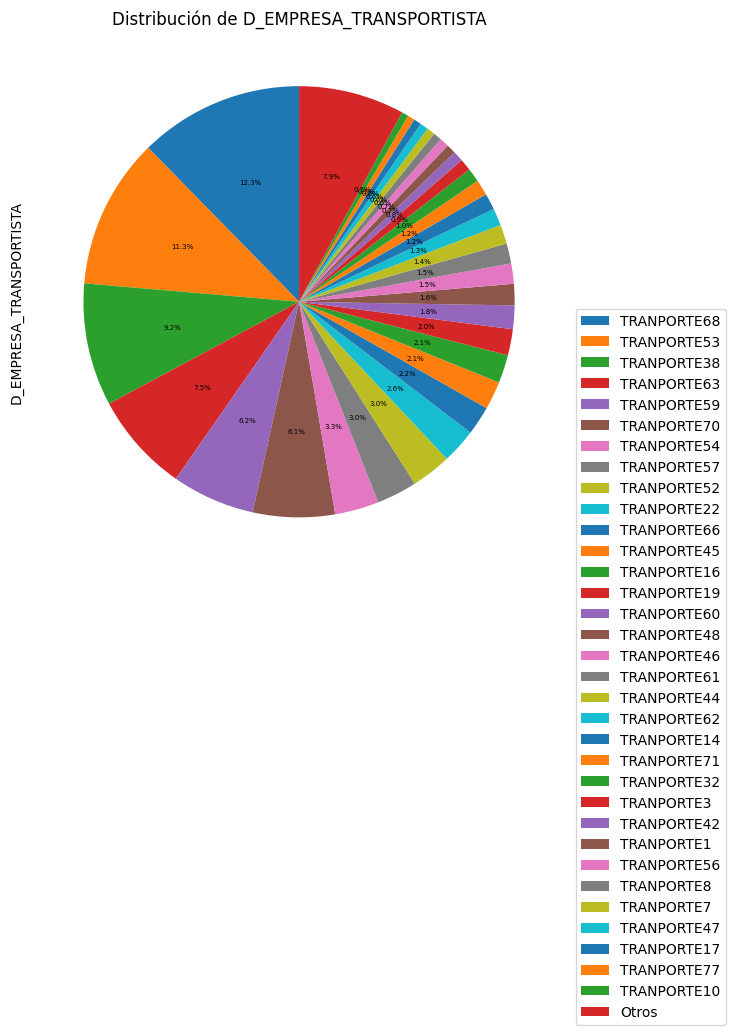

In [16]:
fig, ax = plt.subplots(figsize=(7, 7))
threshold = 0.005 # definir el umbral para agrupar valores en 'Otros'
# agrupar valores en 'Otros' si la frecuencia es menor que el umbral
mask = counts / counts.sum() < threshold
other = counts[mask].sum()
counts = counts[~mask]
counts['Otros'] = other

# plotear el gráfico de pastel
counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, legend=True, labels=None, fontsize=5)

# agregar los nombres de las categorías en el centro del gráfico
ax.set_title('Distribución de D_EMPRESA_TRANSPORTISTA')
ax.legend(labels=counts.index, loc='upper left', bbox_to_anchor=(1, 0.5))

plt.show()

In [17]:
counts_ = data["D_EMPRESA_TRANSPORTISTA"].value_counts()

In [18]:
counts_[counts_ <= 10].index

Index(['TRANPORTE26', 'TRANPORTE51', 'TRANPORTE80', 'TRANPORTE67',
       'TRANPORTE24', 'TRANPORTE4', 'TRANPORTE40', 'TRANPORTE86',
       'TRANPORTE41', 'TRANPORTE73', 'TRANPORTE88', 'TRANPORTE55',
       'TRANPORTE2', 'TRANPORTE6', 'TRANPORTE72', 'TRANPORTE11', 'TRANPORTE90',
       'TRANPORTE65', 'TRANPORTE25', 'TRANPORTE34', 'TRANPORTE21',
       'TRANPORTE91', 'TRANPORTE92', 'TRANPORTE93', 'TRANPORTE5',
       'TRANPORTE36', 'TRANPORTE87', 'TRANPORTE18', 'TRANPORTE89',
       'TRANPORTE94'],
      dtype='object')

Como se puede observar en la gráfica, la mayoría de los viajes fueron ehchos por las mismas empresas transportistas. Por lo que aquellos trasnportistas que realizan menos de 10 viajes cada uno, no representan ni el 1% de los datos. 

El 1% de los datos serán al menos 130 registros, y los registros que se pierden son 119

In [19]:
selected_values = counts_[counts_ >= 10].index
selected_values

Index(['TRANPORTE68', 'TRANPORTE53', 'TRANPORTE38', 'TRANPORTE63',
       'TRANPORTE59', 'TRANPORTE70', 'TRANPORTE54', 'TRANPORTE57',
       'TRANPORTE52', 'TRANPORTE22', 'TRANPORTE66', 'TRANPORTE45',
       'TRANPORTE16', 'TRANPORTE19', 'TRANPORTE60', 'TRANPORTE48',
       'TRANPORTE46', 'TRANPORTE61', 'TRANPORTE44', 'TRANPORTE62',
       'TRANPORTE14', 'TRANPORTE71', 'TRANPORTE32', 'TRANPORTE3',
       'TRANPORTE42', 'TRANPORTE1', 'TRANPORTE56', 'TRANPORTE8', 'TRANPORTE7',
       'TRANPORTE47', 'TRANPORTE17', 'TRANPORTE77', 'TRANPORTE10',
       'TRANPORTE75', 'TRANPORTE31', 'TRANPORTE28', 'TRANPORTE74',
       'TRANPORTE82', 'TRANPORTE49', 'TRANPORTE15', 'TRANPORTE12',
       'TRANPORTE30', 'TRANPORTE35', 'TRANPORTE23', 'TRANPORTE50',
       'TRANPORTE81', 'TRANPORTE76', 'TRANPORTE9', 'TRANPORTE78',
       'TRANPORTE27', 'TRANPORTE20', 'TRANPORTE79', 'TRANPORTE43',
       'TRANPORTE85', 'TRANPORTE69', 'TRANPORTE33', 'TRANPORTE37',
       'TRANPORTE84', 'TRANPORTE83', 'TRANPORTE13', 

In [20]:
selected_rows = data['D_EMPRESA_TRANSPORTISTA'].isin(selected_values)
selected_rows 

0        True
1        True
2        True
3        True
4        True
         ... 
12936    True
12937    True
12938    True
12939    True
12940    True
Name: D_EMPRESA_TRANSPORTISTA, Length: 12941, dtype: bool

No aplique esto para la Modelación con One Hot Encoding pues me causaba algunos valores nulos 

In [21]:
#data = data[selected_rows]

In [22]:
data

,PLANTAORIGEN,D_CLIENTE,ESTADO,D_EMPRESA_TRANSPORTISTA,TIPO_SERVICIO,TIPOTRANSPORTE,TIPO_PRODUCTO,TIPO_FORMA,CANT_PROGRAMADA,CAP_MAXIMA,CIUDAD,is_nuevo_leon,not_nuevo_leon,CANT_PROGRAMADA_DIS
0,Guerrero,CLIENTE58,nuevo leon,TRANPORTE68,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,38.386,54.0,monterrey,1,0,"(35, 42]"
1,Guerrero,CLIENTE132,nuevo leon,TRANPORTE68,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,31.572,54.0,cienega de flores,1,0,"(28, 35]"
2,Guerrero,CLIENTE58,nuevo leon,TRANPORTE68,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,39.265,54.0,monterrey,1,0,"(35, 42]"
3,Guerrero,CLIENTE58,nuevo leon,TRANPORTE68,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,39.900,54.0,monterrey,1,0,"(35, 42]"
4,Guerrero,CLIENTE171,nuevo leon,TRANPORTE68,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,31.677,54.0,apodaca,1,0,"(28, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12936,Pesquería,CLIENTE58,nuevo leon,TRANPORTE53,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,23.540,54.0,monterrey,1,0,"(21, 28]"
12937,Pesquería,CLIENTE198,nuevo leon,TRANPORTE49,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,21.920,54.0,escobedo,1,0,"(21, 28]"
12938,Pesquería,CLIENTE95,nuevo leon,TRANPORTE19,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,21.264,54.0,apodaca,1,0,"(21, 28]"
12939,Pesquería,CLIENTE95,nuevo leon,TRANPORTE68,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,22.945,54.0,apodaca,1,0,"(21, 28]"


In [23]:
counts = data["D_EMPRESA_TRANSPORTISTA"].value_counts()
counts.sum()

12941

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12941 entries, 0 to 12940
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PLANTAORIGEN             12941 non-null  object 
 1   D_CLIENTE                12923 non-null  object 
 2   ESTADO                   12941 non-null  object 
 3   D_EMPRESA_TRANSPORTISTA  12941 non-null  object 
 4   TIPO_SERVICIO            12941 non-null  object 
 5   TIPOTRANSPORTE           12941 non-null  object 
 6   TIPO_PRODUCTO            12941 non-null  object 
 7   TIPO_FORMA               12941 non-null  object 
 8   CANT_PROGRAMADA          12941 non-null  float64
 9   CAP_MAXIMA               12941 non-null  float64
 10  CIUDAD                   12941 non-null  object 
 11  is_nuevo_leon            12941 non-null  int64  
 12  not_nuevo_leon           12941 non-null  int64  
 13  CANT_PROGRAMADA_DIS      12941 non-null  object 
dtypes: float64(2), int64(2

## Labeling 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data['D_EMPRESA_TRANSPORTISTA'] = le.fit_transform(data['D_EMPRESA_TRANSPORTISTA'])

In [ ]:
data['PLANTAORIGEN'].value_counts()

Guerrero     7567
Pesquería    5237
Name: PLANTAORIGEN, dtype: int64

In [ ]:
data['PLANTAORIGEN'] = le.fit_transform(data['PLANTAORIGEN'])

In [ ]:
data['PLANTAORIGEN'].value_counts()

0    7567
1    5237
Name: PLANTAORIGEN, dtype: int64

In [ ]:
data['D_CLIENTE'] = le.fit_transform(data['D_CLIENTE'])
data['TIPO_SERVICIO'] = le.fit_transform(data['TIPO_SERVICIO'])
data['TIPOTRANSPORTE'] = le.fit_transform(data['TIPOTRANSPORTE'])
data['TIPO_PRODUCTO'] = le.fit_transform(data['TIPO_PRODUCTO'])
data['TIPO_FORMA'] = le.fit_transform(data['TIPO_FORMA'])
data['CIUDAD'] = le.fit_transform(data['CIUDAD'])

In [ ]:
data['CANT_PROGRAMADA_DIS'] = le.fit_transform(data['CANT_PROGRAMADA_DIS'])

In [ ]:
data.head()

,PLANTAORIGEN,D_CLIENTE,ESTADO,D_EMPRESA_TRANSPORTISTA,TIPO_SERVICIO,TIPOTRANSPORTE,TIPO_PRODUCTO,TIPO_FORMA,CANT_PROGRAMADA,CAP_MAXIMA,CIUDAD,is_nuevo_leon,not_nuevo_leon,CANT_PROGRAMADA_DIS
0,0,224,nuevo leon,45,1,3,22,1,38.386,54.0,44,1,0,4
1,0,36,nuevo leon,45,1,3,22,1,31.572,54.0,12,1,0,3
2,0,224,nuevo leon,45,1,3,22,1,39.265,54.0,44,1,0,4
3,0,224,nuevo leon,45,1,3,22,1,39.900,54.0,44,1,0,4
4,0,77,nuevo leon,45,1,3,22,1,31.677,54.0,3,1,0,3


In [ ]:
data.dtypes

PLANTAORIGEN                 int64
D_CLIENTE                    int64
ESTADO                      object
D_EMPRESA_TRANSPORTISTA      int64
TIPO_SERVICIO                int64
TIPOTRANSPORTE               int64
TIPO_PRODUCTO                int64
TIPO_FORMA                   int64
CANT_PROGRAMADA            float64
CAP_MAXIMA                 float64
CIUDAD                       int64
is_nuevo_leon                int64
not_nuevo_leon               int64
CANT_PROGRAMADA_DIS          int64
dtype: object

In [ ]:
data = data.drop("ESTADO",axis=1)  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12804 entries, 0 to 12940
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PLANTAORIGEN             12804 non-null  int64  
 1   D_CLIENTE                12804 non-null  int64  
 2   D_EMPRESA_TRANSPORTISTA  12804 non-null  int64  
 3   TIPO_SERVICIO            12804 non-null  int64  
 4   TIPOTRANSPORTE           12804 non-null  int64  
 5   TIPO_PRODUCTO            12804 non-null  int64  
 6   TIPO_FORMA               12804 non-null  int64  
 7   CANT_PROGRAMADA          12804 non-null  float64
 8   CAP_MAXIMA               12804 non-null  float64
 9   CIUDAD                   12804 non-null  int64  
 10  is_nuevo_leon            12804 non-null  int64  
 11  not_nuevo_leon           12804 non-null  int64  
 12  CANT_PROGRAMADA_DIS      12804 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.4 MB


## Pre modelado

In [ ]:
# convert the DataFrame object to a NumPy array to achieve faster computation
array = data.values

In [ ]:
array

array([[  0., 224.,  45., ...,   1.,   0.,   4.],
       [  0.,  36.,  45., ...,   1.,   0.,   3.],
       [  0., 224.,  45., ...,   1.,   0.,   4.],
       ...,
       [  1., 264.,   8., ...,   1.,   0.,   2.],
       [  1., 264.,  45., ...,   1.,   0.,   2.],
       [  1., 264.,  10., ...,   1.,   0.,   2.]])

In [ ]:
array.shape

(12804, 13)

In [ ]:
# segregate into separate variables so that the features and the labels are separated
X = array[:,[0,1,3,4,5,6,7,8,9,10,11,12]]
X

array([[  0., 224.,   1., ...,   1.,   0.,   4.],
       [  0.,  36.,   1., ...,   1.,   0.,   3.],
       [  0., 224.,   1., ...,   1.,   0.,   4.],
       ...,
       [  1., 264.,   1., ...,   1.,   0.,   2.],
       [  1., 264.,   1., ...,   1.,   0.,   2.],
       [  1., 264.,   1., ...,   1.,   0.,   2.]])

In [ ]:
X.shape

(12804, 12)

In [ ]:
np.isnan(X).sum()

0

In [ ]:
Y = array[:,2]
Y

array([45., 45., 45., ...,  8., 45., 10.])

###Selección de características

In [ ]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Num Features: 4
Selected Features: [ True False False False False  True False False False  True  True False]
Feature Ranking: [1 6 9 7 2 1 3 4 5 1 1 8]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


PLANTAORIGEN, TIPO_FORMA, is_nuevo_leon, not_nuevo_leon

In [ ]:
X_2 = X[:,[0,5,9,10]]
X_2

array([[0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       ...,
       [1., 1., 1., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 0.]])

In [ ]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[ 3356.077 41133.257   507.802   258.225  3548.927  2024.029  1636.866
   741.13  24469.543  1512.073  7689.725   286.825]
[[224.  22.  44.   0.]
 [ 36.  22.  12.   0.]
 [224.  22.  44.   0.]
 [224.  22.  44.   0.]
 [ 77.  22.   3.   0.]]


Las características seleccionadas son D_CLIENTE, TIPO_PRODUCTO, CIUDAD, not_nuevo_leon

In [ ]:
X_1 = X[:,[1,8,10,4]]
X_1

array([[224.,  44.,   0.,  22.],
       [ 36.,  12.,   0.,  22.],
       [224.,  44.,   0.,  22.],
       ...,
       [264.,   3.,   0.,  22.],
       [264.,   3.,   0.,  22.],
       [264.,   3.,   0.,  22.]])

In [ ]:
data.head()

,PLANTAORIGEN,D_CLIENTE,D_EMPRESA_TRANSPORTISTA,TIPO_SERVICIO,TIPOTRANSPORTE,TIPO_PRODUCTO,TIPO_FORMA,CANT_PROGRAMADA,CAP_MAXIMA,CIUDAD,is_nuevo_leon,not_nuevo_leon,CANT_PROGRAMADA_DIS
0,0,224,45,1,3,22,1,38.386,54.0,44,1,0,4
1,0,36,45,1,3,22,1,31.572,54.0,12,1,0,3
2,0,224,45,1,3,22,1,39.265,54.0,44,1,0,4
3,0,224,45,1,3,22,1,39.900,54.0,44,1,0,4
4,0,77,45,1,3,22,1,31.677,54.0,3,1,0,3


In [ ]:
# Separación de Datos en Entrenamiento y Prueba
from sklearn.model_selection import train_test_split
#Separo los datos del dataset en entrenamiento y prueba para probar los algoritmos
X_1train, X_1test, y_train, y_test = train_test_split(X_1, Y, test_size=0.2)

In [ ]:
# Separación de Datos en Entrenamiento y Prueba
from sklearn.model_selection import train_test_split
#Separo los datos del dataset en entrenamiento y prueba para probar los algoritmos
X_2train, X_2test, y_train, y_test = train_test_split(X_2, Y, test_size=0.2)

##  Modelos

In [ ]:
from sklearn import datasets
from sklearn import metrics

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
names = []
scores = []
for name, model in models:
    model.fit(X_1train, y_train)
    y_pred = model.predict(X_1test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Name     Score
0  KNN  0.053885
1  SVC  0.124951
2   LR  0.118704
3   DT  0.104256
4  GNB  0.011714
5   RF  0.103085
6   GB  0.110504


No obtuvimos buenos resultados, por lo que vamos a intentarcon las características del método de Envoltura

In [ ]:
names_ = []
scores_ = []
for name, model in models:
    model.fit(X_2train, y_train)
    y_pred = model.predict(X_2test)
    scores_.append(accuracy_score(y_test, y_pred))
    names_.append(name)
tr_split_ = pd.DataFrame({'Name': names_, 'Score': scores_})
print(tr_split_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Name     Score
0  KNN  0.105428
1  SVC  0.229598
2   LR  0.227255
3   DT  0.228817
4  GNB  0.047638
5   RF  0.228817
6   GB  0.229207


Ligeramente mejores resultados pero no se consideran buenos, por lo que intentamos usar One Hot Encoding

### Desbalance

  No se utilizó pues resultó no ser el indicado para variablescategóricas

In [ ]:
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=45, n=1590 (12.418%)
Class=2, n=44 (0.344%)
Class=48, n=793 (6.193%)
Class=28, n=80 (0.625%)
Class=26, n=273 (2.132%)
Class=4, n=158 (1.234%)
Class=10, n=337 (2.632%)
Class=31, n=30 (0.234%)
Class=36, n=91 (0.711%)
Class=40, n=194 (1.515%)
Class=22, n=1189 (9.286%)
Class=14, n=59 (0.461%)
Class=6, n=273 (2.132%)
Class=38, n=805 (6.287%)
Class=0, n=92 (0.719%)
Class=44, n=280 (2.187%)
Class=29, n=206 (1.609%)
Class=33, n=388 (3.030%)
Class=42, n=967 (7.552%)
Class=18, n=134 (1.047%)
Class=25, n=186 (1.453%)
Class=56, n=81 (0.633%)
Class=37, n=393 (3.069%)
Class=13, n=21 (0.164%)
Class=47, n=80 (0.625%)
Class=39, n=229 (1.789%)
Class=49, n=152 (1.187%)
Class=15, n=116 (0.906%)
Class=27, n=195 (1.523%)
Class=41, n=166 (1.296%)
Class=19, n=14 (0.109%)
Class=9, n=20 (0.156%)
Class=8, n=253 (1.976%)
Class=24, n=19 (0.148%)
Class=17, n=64 (0.500%)
Class=46, n=14 (0.109%)
Class=5, n=53 (0.414%)
Class=43, n=11 (0.086%)
Class=1, n=66 (0.515%)
Class=20, n=38 (0.297%)
Class=12, n=10 (0.078%)

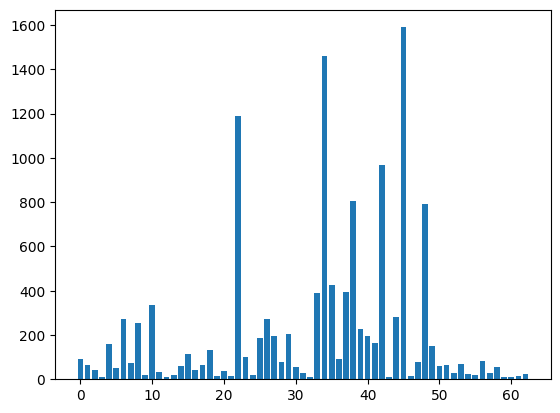

In [ ]:
y = LabelEncoder().fit_transform(Y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Se puede observar que tenemos desbalanceo de datos 

Class=45, n=1590 (1.587%)
Class=2, n=1590 (1.587%)
Class=48, n=1590 (1.587%)
Class=28, n=1590 (1.587%)
Class=26, n=1590 (1.587%)
Class=4, n=1590 (1.587%)
Class=10, n=1590 (1.587%)
Class=31, n=1590 (1.587%)
Class=36, n=1590 (1.587%)
Class=40, n=1590 (1.587%)
Class=22, n=1590 (1.587%)
Class=14, n=1590 (1.587%)
Class=6, n=1590 (1.587%)
Class=38, n=1590 (1.587%)
Class=0, n=1590 (1.587%)
Class=44, n=1590 (1.587%)
Class=29, n=1590 (1.587%)
Class=33, n=1590 (1.587%)
Class=42, n=1590 (1.587%)
Class=18, n=1590 (1.587%)
Class=25, n=1590 (1.587%)
Class=56, n=1590 (1.587%)
Class=37, n=1590 (1.587%)
Class=13, n=1590 (1.587%)
Class=47, n=1590 (1.587%)
Class=39, n=1590 (1.587%)
Class=49, n=1590 (1.587%)
Class=15, n=1590 (1.587%)
Class=27, n=1590 (1.587%)
Class=41, n=1590 (1.587%)
Class=19, n=1590 (1.587%)
Class=9, n=1590 (1.587%)
Class=8, n=1590 (1.587%)
Class=24, n=1590 (1.587%)
Class=17, n=1590 (1.587%)
Class=46, n=1590 (1.587%)
Class=5, n=1590 (1.587%)
Class=43, n=1590 (1.587%)
Class=1, n=1590 (1.

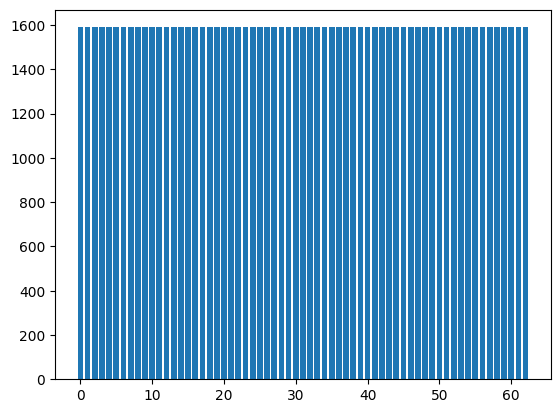

In [ ]:
y = LabelEncoder().fit_transform(Y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
len(X)

100170

In [ ]:
len(y)

100170

## One hot encoding

solo usamos labeling en clientes y empresa transportista pues son muchos valores

In [25]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
data['D_CLIENTE'] = lenc.fit_transform(data['D_CLIENTE'])
data['D_EMPRESA_TRANSPORTISTA'] = lenc.fit_transform(data['D_EMPRESA_TRANSPORTISTA'])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12941 entries, 0 to 12940
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PLANTAORIGEN             12941 non-null  object 
 1   D_CLIENTE                12941 non-null  int64  
 2   ESTADO                   12941 non-null  object 
 3   D_EMPRESA_TRANSPORTISTA  12941 non-null  int64  
 4   TIPO_SERVICIO            12941 non-null  object 
 5   TIPOTRANSPORTE           12941 non-null  object 
 6   TIPO_PRODUCTO            12941 non-null  object 
 7   TIPO_FORMA               12941 non-null  object 
 8   CANT_PROGRAMADA          12941 non-null  float64
 9   CAP_MAXIMA               12941 non-null  float64
 10  CIUDAD                   12941 non-null  object 
 11  is_nuevo_leon            12941 non-null  int64  
 12  not_nuevo_leon           12941 non-null  int64  
 13  CANT_PROGRAMADA_DIS      12941 non-null  object 
dtypes: float64(2), int64(4

In [27]:
data = data.dropna()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12941 entries, 0 to 12940
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PLANTAORIGEN             12941 non-null  object 
 1   D_CLIENTE                12941 non-null  int64  
 2   ESTADO                   12941 non-null  object 
 3   D_EMPRESA_TRANSPORTISTA  12941 non-null  int64  
 4   TIPO_SERVICIO            12941 non-null  object 
 5   TIPOTRANSPORTE           12941 non-null  object 
 6   TIPO_PRODUCTO            12941 non-null  object 
 7   TIPO_FORMA               12941 non-null  object 
 8   CANT_PROGRAMADA          12941 non-null  float64
 9   CAP_MAXIMA               12941 non-null  float64
 10  CIUDAD                   12941 non-null  object 
 11  is_nuevo_leon            12941 non-null  int64  
 12  not_nuevo_leon           12941 non-null  int64  
 13  CANT_PROGRAMADA_DIS      12941 non-null  object 
dtypes: float64(2), int64(4

In [29]:
data.head()

,PLANTAORIGEN,D_CLIENTE,ESTADO,D_EMPRESA_TRANSPORTISTA,TIPO_SERVICIO,TIPOTRANSPORTE,TIPO_PRODUCTO,TIPO_FORMA,CANT_PROGRAMADA,CAP_MAXIMA,CIUDAD,is_nuevo_leon,not_nuevo_leon,CANT_PROGRAMADA_DIS
0,Guerrero,227,nuevo leon,61,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,38.386,54.0,monterrey,1,0,"(35, 42]"
1,Guerrero,36,nuevo leon,61,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,31.572,54.0,cienega de flores,1,0,"(28, 35]"
2,Guerrero,227,nuevo leon,61,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,39.265,54.0,monterrey,1,0,"(35, 42]"
3,Guerrero,227,nuevo leon,61,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,39.900,54.0,monterrey,1,0,"(35, 42]"
4,Guerrero,78,nuevo leon,61,LO,plataforma 3 ejes neumática,ROLLO,PLANOS,31.677,54.0,apodaca,1,0,"(28, 35]"


In [30]:
y = pd.get_dummies(data.PLANTAORIGEN, prefix='PLANTAORIGEN')
data['PLANTAORIGEN_Guerrero'] = y['PLANTAORIGEN_Guerrero']
data['PLANTAORIGEN_Pesquería'] = y['PLANTAORIGEN_Pesquería']
data.drop("PLANTAORIGEN",axis=1, inplace=True)

Solo nos interesa saber si es de Nuevo León o no, para reducir columnas. Así que eeliminamos TIPO_SERVICIO que nos idce si es local o foráneo.

In [31]:
data.drop("TIPO_SERVICIO",axis=1, inplace=True)

In [32]:
data.head()

,D_CLIENTE,ESTADO,D_EMPRESA_TRANSPORTISTA,TIPOTRANSPORTE,TIPO_PRODUCTO,TIPO_FORMA,CANT_PROGRAMADA,CAP_MAXIMA,CIUDAD,is_nuevo_leon,not_nuevo_leon,CANT_PROGRAMADA_DIS,PLANTAORIGEN_Guerrero,PLANTAORIGEN_Pesquería
0,227,nuevo leon,61,plataforma 3 ejes neumática,ROLLO,PLANOS,38.386,54.0,monterrey,1,0,"(35, 42]",1,0
1,36,nuevo leon,61,plataforma 3 ejes neumática,ROLLO,PLANOS,31.572,54.0,cienega de flores,1,0,"(28, 35]",1,0
2,227,nuevo leon,61,plataforma 3 ejes neumática,ROLLO,PLANOS,39.265,54.0,monterrey,1,0,"(35, 42]",1,0
3,227,nuevo leon,61,plataforma 3 ejes neumática,ROLLO,PLANOS,39.900,54.0,monterrey,1,0,"(35, 42]",1,0
4,78,nuevo leon,61,plataforma 3 ejes neumática,ROLLO,PLANOS,31.677,54.0,apodaca,1,0,"(28, 35]",1,0


In [33]:
data['TIPO_PRODUCTO'] = data['TIPO_PRODUCTO'].str.split(',')

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer

In [35]:
mlb = MultiLabelBinarizer()
one_hot = pd.DataFrame(mlb.fit_transform(data['TIPO_PRODUCTO']), columns=mlb.classes_, index=data.index)

In [36]:
data = pd.concat([data, one_hot], axis=1)
data = data.drop('TIPO_PRODUCTO', axis = 1)

Debido a que el producto pertenece a un tipo forma, al considerar el tipo de producto, este implica su pertenencia a una forma. Por lo que eliminamos esta columna de TIPO_FORMA

In [37]:
data = data.drop('TIPO_FORMA', axis = 1)

In [38]:
data.head()

,D_CLIENTE,ESTADO,D_EMPRESA_TRANSPORTISTA,TIPOTRANSPORTE,CANT_PROGRAMADA,CAP_MAXIMA,CIUDAD,is_nuevo_leon,not_nuevo_leon,CANT_PROGRAMADA_DIS,...,ALAMBRON,BANDA,CHATARRA,CINTA,CUADRADO,HOJA,POLIN Z,RECTANGULAR,REDONDO,ROLLO
0,227,nuevo leon,61,plataforma 3 ejes neumática,38.386,54.0,monterrey,1,0,"(35, 42]",...,0,0,0,0,0,0,0,0,0,1
1,36,nuevo leon,61,plataforma 3 ejes neumática,31.572,54.0,cienega de flores,1,0,"(28, 35]",...,0,0,0,0,0,0,0,0,0,1
2,227,nuevo leon,61,plataforma 3 ejes neumática,39.265,54.0,monterrey,1,0,"(35, 42]",...,0,0,0,0,0,0,0,0,0,1
3,227,nuevo leon,61,plataforma 3 ejes neumática,39.900,54.0,monterrey,1,0,"(35, 42]",...,0,0,0,0,0,0,0,0,0,1
4,78,nuevo leon,61,plataforma 3 ejes neumática,31.677,54.0,apodaca,1,0,"(28, 35]",...,0,0,0,0,0,0,0,0,0,1


In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
codificador = OneHotEncoder()
codificacion = codificador.fit_transform(data[['TIPOTRANSPORTE']])
print(type(codificacion))
print(codificacion.toarray())

<class 'scipy.sparse._csr.csr_matrix'>
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [41]:
nuevas_cols = pd.DataFrame(codificacion.toarray(), columns = codificador.categories_)
nuevas_cols.head()

,caja seca 2 ejes neumática,plataforma 2 ejes muelles,plataforma 2 ejes neumática,plataforma 3 ejes muelles,plataforma 3 ejes neumática,tolva,torton
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
data = pd.concat([data, nuevas_cols], axis=1)
data.head()

,D_CLIENTE,ESTADO,D_EMPRESA_TRANSPORTISTA,TIPOTRANSPORTE,CANT_PROGRAMADA,CAP_MAXIMA,CIUDAD,is_nuevo_leon,not_nuevo_leon,CANT_PROGRAMADA_DIS,...,RECTANGULAR,REDONDO,ROLLO,"(caja seca 2 ejes neumática,)","(plataforma 2 ejes muelles,)","(plataforma 2 ejes neumática,)","(plataforma 3 ejes muelles,)","(plataforma 3 ejes neumática,)","(tolva,)","(torton,)"
0,227,nuevo leon,61,plataforma 3 ejes neumática,38.386,54.0,monterrey,1,0,"(35, 42]",...,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,36,nuevo leon,61,plataforma 3 ejes neumática,31.572,54.0,cienega de flores,1,0,"(28, 35]",...,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,227,nuevo leon,61,plataforma 3 ejes neumática,39.265,54.0,monterrey,1,0,"(35, 42]",...,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,227,nuevo leon,61,plataforma 3 ejes neumática,39.900,54.0,monterrey,1,0,"(35, 42]",...,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,78,nuevo leon,61,plataforma 3 ejes neumática,31.677,54.0,apodaca,1,0,"(28, 35]",...,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
data = data.rename(columns={col: str(col).strip("(),").replace("'", "") for col in data.columns}) 

In [44]:
data= data.drop('TIPOTRANSPORTE', axis = 1)

In [45]:
data.head()

,D_CLIENTE,ESTADO,D_EMPRESA_TRANSPORTISTA,CANT_PROGRAMADA,CAP_MAXIMA,CIUDAD,is_nuevo_leon,not_nuevo_leon,CANT_PROGRAMADA_DIS,PLANTAORIGEN_Guerrero,...,RECTANGULAR,REDONDO,ROLLO,caja seca 2 ejes neumática,plataforma 2 ejes muelles,plataforma 2 ejes neumática,plataforma 3 ejes muelles,plataforma 3 ejes neumática,tolva,torton
0,227,nuevo leon,61,38.386,54.0,monterrey,1,0,"(35, 42]",1,...,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,36,nuevo leon,61,31.572,54.0,cienega de flores,1,0,"(28, 35]",1,...,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,227,nuevo leon,61,39.265,54.0,monterrey,1,0,"(35, 42]",1,...,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,227,nuevo leon,61,39.900,54.0,monterrey,1,0,"(35, 42]",1,...,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,78,nuevo leon,61,31.677,54.0,apodaca,1,0,"(28, 35]",1,...,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12941 entries, 0 to 12940
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   D_CLIENTE                    12941 non-null  int64  
 1   ESTADO                       12941 non-null  object 
 2   D_EMPRESA_TRANSPORTISTA      12941 non-null  int64  
 3   CANT_PROGRAMADA              12941 non-null  float64
 4   CAP_MAXIMA                   12941 non-null  float64
 5   CIUDAD                       12941 non-null  object 
 6   is_nuevo_leon                12941 non-null  int64  
 7   not_nuevo_leon               12941 non-null  int64  
 8   CANT_PROGRAMADA_DIS          12941 non-null  object 
 9   PLANTAORIGEN_Guerrero        12941 non-null  uint8  
 10  PLANTAORIGEN_Pesquería       12941 non-null  uint8  
 11  ALAMBRON                     12941 non-null  int64  
 12  BANDA                        12941 non-null  int64  
 13  CHATARRA        

Estados

In [47]:
data['ESTADO'].unique()

array(['nuevo leon', 'san luis potosi', 'coahuila', 'tamaulipas',
       'baja california', 'queretaro', 'aguascalientes', 'guanajuato',
       'mexico', 'tlaxcala', 'chiapas', 'ciudad de mexico',
       'estado de mexico', 'puebla', 'jalisco', 'morelos', 'hidalgo',
       'chihuahua', 'sonora', 'veracruz', 'tabasco', 'sinaloa',
       'michoacan', 'yucatan', 'oaxaca', 'durango'], dtype=object)

In [48]:
estados_regiones = {
    'aguascalientes': 'Centronorte',
    'baja california': 'Noroeste',
    'baja california sur': 'Noroeste',
    'campeche': 'Sureste',
    'chiapas': 'Sureste',
    'chihuahua': 'Noroeste',
    'coahuila': 'Noreste',
    'colima': 'Occidente',
    'durango': 'Noroeste',
    'guanajuato': 'Centronorte',
    'guerrero': 'Sureste',
    'hidalgo': 'Oriente',
    'jalisco': 'Occidente',
    'mexico': 'Centrosur',
    'michoacan': 'Occidente',
    'morelos': 'Centrosur',
    'nayarit': 'Occidente',
    'nuevo leon': 'Noreste',
    'oaxaca': 'Sureste',
    'puebla': 'Oriente',
    'queretaro': 'Centronorte',
    'quintana roo': 'Suroeste',
    'san luis potosi': 'Centronorte',
    'sinaloa': 'Noroeste',
    'sonora': 'Noroeste',
    'tabasco': 'Suroeste',
    'tamaulipas': 'Noreste',
    'tlaxcala': 'Oriente',
    'veracruz': 'Oriente',
    'yucatan': 'Suroeste',
    'zacatecas': 'Centronorte',
    'estado de mexico': 'Centrosur',
    'ciudad de mexico': 'Centrosur'
}

In [49]:
data['regiones'] = data['ESTADO'].apply(lambda x: estados_regiones.get(x))
data['regiones'].isnull().sum()

0

In [50]:
data.drop('ESTADO', axis = 1, inplace=True)

In [51]:
codificador = OneHotEncoder()
codificacion = codificador.fit_transform(data[['regiones']])
print(type(codificacion))
print(codificacion.toarray())

<class 'scipy.sparse._csr.csr_matrix'>
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [52]:
nuevas_cols = pd.DataFrame(codificacion.toarray(), columns = codificador.categories_)
nuevas_cols.head()

,Centronorte,Centrosur,Noreste,Noroeste,Occidente,Oriente,Sureste,Suroeste
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
data = pd.concat([data, nuevas_cols], axis=1)
data.head()

,D_CLIENTE,D_EMPRESA_TRANSPORTISTA,CANT_PROGRAMADA,CAP_MAXIMA,CIUDAD,is_nuevo_leon,not_nuevo_leon,CANT_PROGRAMADA_DIS,PLANTAORIGEN_Guerrero,PLANTAORIGEN_Pesquería,...,torton,regiones,"(Centronorte,)","(Centrosur,)","(Noreste,)","(Noroeste,)","(Occidente,)","(Oriente,)","(Sureste,)","(Suroeste,)"
0,227,61,38.386,54.0,monterrey,1,0,"(35, 42]",1,0,...,0.0,Noreste,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,36,61,31.572,54.0,cienega de flores,1,0,"(28, 35]",1,0,...,0.0,Noreste,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,227,61,39.265,54.0,monterrey,1,0,"(35, 42]",1,0,...,0.0,Noreste,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,227,61,39.900,54.0,monterrey,1,0,"(35, 42]",1,0,...,0.0,Noreste,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,78,61,31.677,54.0,apodaca,1,0,"(28, 35]",1,0,...,0.0,Noreste,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [54]:
data = data.rename(columns={col: str(col).strip("(),").replace("'", "") for col in data.columns}) 
data.drop('regiones', axis = 1, inplace=True)
data.head()

,D_CLIENTE,D_EMPRESA_TRANSPORTISTA,CANT_PROGRAMADA,CAP_MAXIMA,CIUDAD,is_nuevo_leon,not_nuevo_leon,CANT_PROGRAMADA_DIS,PLANTAORIGEN_Guerrero,PLANTAORIGEN_Pesquería,...,tolva,torton,Centronorte,Centrosur,Noreste,Noroeste,Occidente,Oriente,Sureste,Suroeste
0,227,61,38.386,54.0,monterrey,1,0,"(35, 42]",1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,36,61,31.572,54.0,cienega de flores,1,0,"(28, 35]",1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,227,61,39.265,54.0,monterrey,1,0,"(35, 42]",1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,227,61,39.900,54.0,monterrey,1,0,"(35, 42]",1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,78,61,31.677,54.0,apodaca,1,0,"(28, 35]",1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [55]:
data.dtypes

D_CLIENTE                        int64
D_EMPRESA_TRANSPORTISTA          int64
CANT_PROGRAMADA                float64
CAP_MAXIMA                     float64
CIUDAD                          object
is_nuevo_leon                    int64
not_nuevo_leon                   int64
CANT_PROGRAMADA_DIS             object
PLANTAORIGEN_Guerrero            uint8
PLANTAORIGEN_Pesquería           uint8
ALAMBRON                         int64
BANDA                            int64
CHATARRA                         int64
CINTA                            int64
CUADRADO                         int64
HOJA                             int64
POLIN Z                          int64
RECTANGULAR                      int64
REDONDO                          int64
ROLLO                            int64
caja seca 2 ejes neumática     float64
plataforma 2 ejes muelles      float64
plataforma 2 ejes neumática    float64
plataforma 3 ejes muelles      float64
plataforma 3 ejes neumática    float64
tolva                    

Como ya tenemos la divisón de estados podemos ignorar las de ciudades, pues cada ciudad pertence a un estado en particular, de estado froma las ciudades ya vienen dentro de lso estados, por otra parte CANT_PROGRAMADA_DIS fue más que nada útil para comprender mejor la distribicon de la variable, no para el modelado

In [56]:
data.drop(['CIUDAD','CANT_PROGRAMADA_DIS'], axis = 1, inplace=True)

In [57]:
data.columns

Index(['D_CLIENTE', 'D_EMPRESA_TRANSPORTISTA', 'CANT_PROGRAMADA', 'CAP_MAXIMA',
       'is_nuevo_leon', 'not_nuevo_leon', 'PLANTAORIGEN_Guerrero',
       'PLANTAORIGEN_Pesquería', 'ALAMBRON', 'BANDA', 'CHATARRA', 'CINTA',
       'CUADRADO', 'HOJA', 'POLIN Z', 'RECTANGULAR', 'REDONDO', 'ROLLO',
       'caja seca 2 ejes neumática', 'plataforma 2 ejes muelles',
       'plataforma 2 ejes neumática', 'plataforma 3 ejes muelles',
       'plataforma 3 ejes neumática', 'tolva', 'torton', 'Centronorte',
       'Centrosur', 'Noreste', 'Noroeste', 'Occidente', 'Oriente', 'Sureste',
       'Suroeste'],
      dtype='object')

In [58]:
new_index = ['D_EMPRESA_TRANSPORTISTA','D_CLIENTE', 'CANT_PROGRAMADA', 'CAP_MAXIMA',
       'is_nuevo_leon', 'not_nuevo_leon', 'PLANTAORIGEN_Guerrero',
       'PLANTAORIGEN_Pesquería', 'ALAMBRON', 'BANDA', 'CHATARRA', 'CINTA',
       'CUADRADO', 'HOJA', 'POLIN Z', 'RECTANGULAR', 'REDONDO', 'ROLLO',
       'plataforma 2 ejes muelles', 'plataforma 2 ejes neumática',
       'plataforma 3 ejes muelles', 'plataforma 3 ejes neumática', 'tolva',
       'torton', 'Centronorte', 'Centrosur', 'Noreste', 'Noroeste',
       'Occidente', 'Oriente', 'Sureste', 'Suroeste']
data = data.reindex(columns=new_index)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12941 entries, 0 to 12940
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   D_EMPRESA_TRANSPORTISTA      12941 non-null  int64  
 1   D_CLIENTE                    12941 non-null  int64  
 2   CANT_PROGRAMADA              12941 non-null  float64
 3   CAP_MAXIMA                   12941 non-null  float64
 4   is_nuevo_leon                12941 non-null  int64  
 5   not_nuevo_leon               12941 non-null  int64  
 6   PLANTAORIGEN_Guerrero        12941 non-null  uint8  
 7   PLANTAORIGEN_Pesquería       12941 non-null  uint8  
 8   ALAMBRON                     12941 non-null  int64  
 9   BANDA                        12941 non-null  int64  
 10  CHATARRA                     12941 non-null  int64  
 11  CINTA                        12941 non-null  int64  
 12  CUADRADO                     12941 non-null  int64  
 13  HOJA            

In [60]:
data.dropna()

,D_EMPRESA_TRANSPORTISTA,D_CLIENTE,CANT_PROGRAMADA,CAP_MAXIMA,is_nuevo_leon,not_nuevo_leon,PLANTAORIGEN_Guerrero,PLANTAORIGEN_Pesquería,ALAMBRON,BANDA,...,tolva,torton,Centronorte,Centrosur,Noreste,Noroeste,Occidente,Oriente,Sureste,Suroeste
0,61,227,38.386,54.0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,61,36,31.572,54.0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,61,227,39.265,54.0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,61,227,39.900,54.0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,61,78,31.677,54.0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12936,46,227,23.540,54.0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12937,41,107,21.920,54.0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12938,10,268,21.264,54.0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12939,61,268,22.945,54.0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [62]:
data.to_excel('DataReaady.xlsx')

## Pre modelado 2.0

In [2]:
from pandas import read_excel
data = pd.read_excel('DataReaady.xlsx')

In [3]:
array = data.values

In [4]:
Y = array[:,1]
Y.shape

(12941,)

In [93]:
target = ['D_EMPRESA_TRANSPORTISTA']

In [5]:
X = array[:,2:-1]
X.shape

(12941, 30)

In [6]:
# Separación de Datos en Entrenamiento y Prueba
from sklearn.model_selection import train_test_split
#Separo los datos del dataset en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Modelado 2.0

In [7]:
from sklearn import datasets
from sklearn import metrics

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

In [9]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Name     Score
0  KNN  0.227887
1  SVC  0.164929
2   LR  0.177289
3   DT  0.227501
4  GNB  0.098494
5   RF  0.229818
6   GB  0.178834


Los resultados no fueron tan buenos, pero el modleo que presentó mayo exactitud GaussianNB, seguido de  KNeighborsClassifier y DecisionTreeClassifier.

primero intentemos reducir la dimensionalidad haciendo uso de la selección de características

In [ ]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Num Features: 10
Selected Features: [ True  True  True  True  True  True  True False False False  True False
 False False False False  True False False False False False False False
 False  True False False False False]
Feature Ranking: [ 1  1  1  1  1  1  1 20 17 12  1  9  5 21 15  8  1 19  3 10  2 18 11  6
  4  1  7 14 16 13]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
X_1 = X[:,[0,1,2,3,4,5,6,10,16,26]]
X_1

array([[227.   ,  38.386,  54.   , ...,   0.   ,   1.   ,   0.   ],
       [ 36.   ,  31.572,  54.   , ...,   0.   ,   1.   ,   0.   ],
       [227.   ,  39.265,  54.   , ...,   0.   ,   1.   ,   0.   ],
       ...,
       [268.   ,  21.264,  54.   , ...,   0.   ,   1.   ,   0.   ],
       [268.   ,  22.945,  54.   , ...,   0.   ,   1.   ,   0.   ],
       [268.   ,  21.744,  54.   , ...,   0.   ,   1.   ,   0.   ]])

In [92]:
selected = ['D_CLIENTE', 'CANT_PROGRAMADA',	'CAP_MAXIMA',	'is_nuevo_leon',	'not_nuevo_leon', 'PLANTAORIGEN_Guerrero', 'PLANTAORIGEN_Pesquería', 'CINTA', 'ROLLO', 'Noroeste']

In [13]:
# Separación de Datos en Entrenamiento y Prueba
from sklearn.model_selection import train_test_split
#Separo los datos del dataset en entrenamiento y prueba para probar los algoritmos
X_1train, X_1test, y_train, y_test = train_test_split(X_1, Y, test_size=0.2)

In [ ]:
names = []
scores = []
for name, model in models:
    model.fit(X_1train, y_train)
    y_pred = model.predict(X_1test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split1 = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split1)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Name     Score
0  KNN  0.236385
1  SVC  0.173812
2   LR  0.188490
3   DT  0.223252
4  GNB  0.076864
5   RF  0.225183
6   GB  0.288915


El modelo que tuvo mayor exactitud fue GradientBoostingClassifier, seguido por KNeighborsClassifier y RandomForestClassifier.

  Seleccionamos los modelos que pueden variar sus parámetros para probar con ellos

In [ ]:
#Bosques Aleatorios
from sklearn.ensemble import RandomForestClassifier
algoritmo = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
#Entreno el modelo
algoritmo.fit(X_1train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_1test)

In [ ]:
accuracyBA = metrics.accuracy_score(y_test, y_pred)
print("Exactitud del modelo: ")
print(accuracyBA)

Exactitud del modelo: 
0.22325222093472383


In [ ]:
#Bosques Aleatorios
from sklearn.ensemble import RandomForestClassifier
algoritmo = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth=10)
#Entreno el modelo
algoritmo.fit(X_1train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_1test)

In [ ]:
accuracyBA_ = metrics.accuracy_score(y_test, y_pred)
print("Exactitud del modelo: ")
print(accuracyBA_)

Exactitud del modelo: 
0.3074546156817304


In [ ]:
#Bosques Aleatorios
from sklearn.ensemble import RandomForestClassifier
algoritmo = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', max_depth=10)
#Entreno el modelo
algoritmo.fit(X_1train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_1test)

In [ ]:
accuracy_BA_ = metrics.accuracy_score(y_test, y_pred)
print("Exactitud del modelo: ")
print(accuracy_BA_)

Exactitud del modelo: 
0.3082271147161066


RandomForest tiene mayor exactitud entre más n_estimators considere.

In [ ]:
# IMPLEMENTACIÓN DE K VECINOS MÁS CERCANOS 
#Defino el algoritmo a utilizar
from sklearn.neighbors import KNeighborsClassifier
algoritmo = KNeighborsClassifier(n_neighbors = 300, metric = 'minkowski', p = 2)
#Entreno el modelo
algoritmo.fit(X_1train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_1test)

In [ ]:
accuracyKn = metrics.accuracy_score(y_test, y_pred)
print("Exactitud del modelo: ")
print(accuracyKn)

Exactitud del modelo: 
0.2081884897643878


In [ ]:
# IMPLEMENTACIÓN DE K VECINOS MÁS CERCANOS 
#Defino el algoritmo a utilizar
from sklearn.neighbors import KNeighborsClassifier
algoritmo = KNeighborsClassifier(n_neighbors = 30, metric = 'minkowski', p = 2)
#Entreno el modelo
algoritmo.fit(X_1train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_1test)

In [ ]:
accuracy_Kn = metrics.accuracy_score(y_test, y_pred)
print("Exactitud del modelo: ")
print(accuracy_Kn)

Exactitud del modelo: 
0.26264967168791037


In [ ]:
# IMPLEMENTACIÓN DE K VECINOS MÁS CERCANOS 
#Defino el algoritmo a utilizar
from sklearn.neighbors import KNeighborsClassifier
algoritmo = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
#Entreno el modelo
algoritmo.fit(X_1train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_1test)

In [ ]:
accuracy_Kn_ = metrics.accuracy_score(y_test, y_pred)
print("Exactitud del modelo: ")
print(accuracy_Kn_)

Exactitud del modelo: 
0.2614909231363461


Con KNeighbors el número de neighbors que daba mejores resultados es alrededor del 30.

In [26]:
#SVC
from sklearn.svm import SVC
algoritmo = SVC(kernel = 'linear', max_iter=100000)
#Entreno el modelo
algoritmo.fit(X_1train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_1test)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [27]:
#Calculo la exactitud del modelo
accuracySVC = metrics.accuracy_score(y_test, y_pred)
print('Exactitud del modelo SVC:')
print(accuracySVC)

Exactitud del modelo SVC:
0.2213209733487833


In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression(max_iter=1000)
#Entreno el modelo
algoritmo.fit(X_1train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_1test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
#Calculo la exactitud del modelo
accuracyLR = metrics.accuracy_score(y_test, y_pred)
print("Exactitud del modelo de Regresión Logística")
print(accuracyLR)

Exactitud del modelo de Regresión Logística
0.23561220548474315


In [90]:
#Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
algoritmo = DecisionTreeClassifier(criterion = 'gini', splitter='random')
#Entreno el modelo
algoritmo.fit(X_1train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_1test)

In [87]:
#Calculo la exactitud del modelo
accuracyDT = metrics.accuracy_score(y_test, y_pred)
print("Exactitud del modelo Arboles de Decision")
print(accuracyDT)

Exactitud del modelo Arboles de Decision
0.22479721900347624


## Arbol

In [127]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [128]:
clf =  DecisionTreeClassifier(random_state=1234)

In [129]:
selected

['D_CLIENTE',
 'CANT_PROGRAMADA',
 'CAP_MAXIMA',
 'is_nuevo_leon',
 'not_nuevo_leon',
 'PLANTAORIGEN_Guerrero',
 'PLANTAORIGEN_Pesquería',
 'CINTA',
 'ROLLO',
 'Noroeste']

In [130]:
X_3 = data[selected]
X_3

,D_CLIENTE,CANT_PROGRAMADA,CAP_MAXIMA,is_nuevo_leon,not_nuevo_leon,PLANTAORIGEN_Guerrero,PLANTAORIGEN_Pesquería,CINTA,ROLLO,Noroeste
0,227,38.386,54.0,1,0,1,0,0,1,0
1,36,31.572,54.0,1,0,1,0,0,1,0
2,227,39.265,54.0,1,0,1,0,0,1,0
3,227,39.900,54.0,1,0,1,0,0,1,0
4,78,31.677,54.0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
12936,227,23.540,54.0,1,0,0,1,0,1,0
12937,107,21.920,54.0,1,0,0,1,0,1,0
12938,268,21.264,54.0,1,0,0,1,0,1,0
12939,268,22.945,54.0,1,0,0,1,0,1,0


In [131]:
Y = data[target]
Y

,D_EMPRESA_TRANSPORTISTA
0,61
1,61
2,61
3,61
4,61
...,...
12936,46
12937,41
12938,10
12939,61


In [132]:
# Separación de Datos en Entrenamiento y Prueba
from sklearn.model_selection import train_test_split
#Separo los datos del dataset en entrenamiento y prueba para probar los algoritmos
X_3train, X_3test, y_train, y_test = train_test_split(X_3, Y, test_size=0.2)

In [133]:
model = clf.fit(X_3train, y_train)

In [134]:
X_3train.shape

(10352, 10)

In [135]:
y_train.shape

(10352, 1)

In [136]:
len(X_3train)

10352

In [137]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_5 <= 0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_2 <= 49.50
|   |   |   |--- feature_2 <= 47.25
|   |   |   |   |--- feature_1 <= 20.65
|   |   |   |   |   |--- feature_0 <= 53.00
|   |   |   |   |   |   |--- class: 35
|   |   |   |   |   |--- feature_0 >  53.00
|   |   |   |   |   |   |--- class: 76
|   |   |   |   |--- feature_1 >  20.65
|   |   |   |   |   |--- feature_0 <= 138.50
|   |   |   |   |   |   |--- feature_1 <= 26.10
|   |   |   |   |   |   |   |--- feature_1 <= 23.80
|   |   |   |   |   |   |   |   |--- class: 64
|   |   |   |   |   |   |   |--- feature_1 >  23.80
|   |   |   |   |   |   |   |   |--- class: 76
|   |   |   |   |   |   |--- feature_1 >  26.10
|   |   |   |   |   |   |   |--- class: 64
|   |   |   |   |   |--- feature_0 >  138.50
|   |   |   |   |   |   |--- feature_0 <= 179.00
|   |   |   |   |   |   |   |--- class: 76
|   |   |   |   |   |   |--- feature_0 >  179.00
|   |   |   |   |   |   |   |--- feature_1 <= 23.05
|   |   |   |   

In [138]:
len(selected)

10

In [140]:
np.array(selected)

array(['D_CLIENTE', 'CANT_PROGRAMADA', 'CAP_MAXIMA', 'is_nuevo_leon',
       'not_nuevo_leon', 'PLANTAORIGEN_Guerrero',
       'PLANTAORIGEN_Pesquería', 'CINTA', 'ROLLO', 'Noroeste'],
      dtype='<U22')

In [141]:
import graphviz
from sklearn import tree
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X_3train, y_train)
data = data.astype(str)
data.drop("D_EMPRESA_TRANSPORTISTA", axis=1)
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=None,  
                                class_names=data['D_EMPRESA_TRANSPORTISTA'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("arbol_decision")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0476229 to fit


'arbol_decision.png'